In [0]:
#Multi-Task Convoluted Neural Networks
from mtcnn.mtcnn import MTCNN
from keras_vggface.utils import preprocess_input
from keras_vggface.vggface import VGGFace
from scipy.spatial.distance import cosine
#matplot for reading out images
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from numpy import asarray
from PIL import Image

In [0]:
#get images from an external server and store it locally
import urllib.request

def store_image(url, local_file_name):
  with urllib.request.urlopen(url) as resource:
    with open(local_file_name, 'wb') as f:
      f.write(resource.read())

In [0]:
store_image('https://upload.wikimedia.org/wikipedia/commons/c/c2/Rihanna_Fenty_2018.png',
            'rihanna_1.jpg')
store_image('https://djbooth.net/.image/ar_1:1%2Cc_fill%2Ccs_srgb%2Cfl_progressive%2Cq_auto:good%2Cw_1200/MTU5OTg0ODI3ODI1NjYxNDcy/rihanna-2016-ah.jpg',
            'rihanna_2.jpg')

In [45]:
#read image to array using matplot
image= plt.imread('rihanna_1.jpg')
#initialize an MTCNN() object into the detector variable and use the .detect_faces() method to detect the faces in an image
detector = MTCNN()

faces = detector.detect_faces(image)

for face in faces:
    print(face)

{'box': [276, 118, 189, 260], 'confidence': 0.9999974966049194, 'keypoints': {'left_eye': (366, 236), 'right_eye': (442, 229), 'nose': (435, 281), 'mouth_left': (363, 316), 'mouth_right': (441, 309)}}


In [0]:
def highlight_faces(image_path, faces):
  # display image
    image = plt.imread(image_path)
    plt.imshow(image)
    #To get the current polar axes on the current figure:
    ax = plt.gca()

    # for each face, draw a rectangle based on coordinates
    for face in faces:
        x, y, width, height = face['box']
        face_border = Rectangle((x, y), width, height, fill=False, color='green')
        ax.add_patch(face_border)
    plt.show()

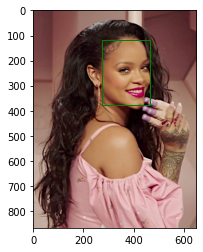

In [47]:
highlight_faces('rihanna_1.jpg', faces)

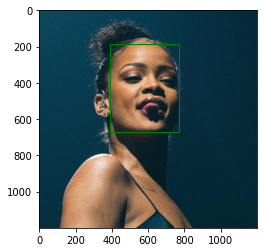

In [48]:
image = plt.imread('rihanna_2.jpg')
faces = detector.detect_faces(image)

highlight_faces('rihanna_2.jpg', faces)

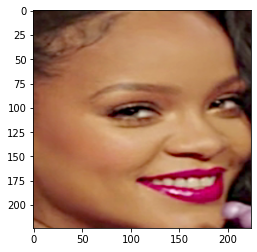

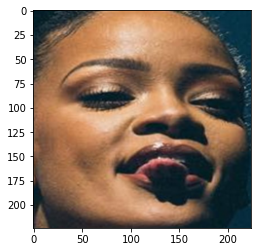

In [50]:
def extract_face_from_image(image_path, required_size=(224, 224)):
  # load image and detect faces
    image = plt.imread(image_path)
    detector = MTCNN()
    faces = detector.detect_faces(image)

    face_images = []

    for face in faces:
        # extract the bounding box from the requested face
        x1, y1, width, height = face['box']
        x2, y2 = x1 + width, y1 + height

        # extract the face
        face_boundary = image[y1:y2, x1:x2]

        # resize pixels to the model size
        face_image = Image.fromarray(face_boundary)
        face_image = face_image.resize(required_size)
        face_array = asarray(face_image)
        face_images.append(face_array)

    return face_images

extracted_face_1 = extract_face_from_image('rihanna_1.jpg')
extracted_face_2 = extract_face_from_image('rihanna_2.jpg')

# Display the first face from the extracted faces
plt.imshow(extracted_face_1[0])
plt.show()
plt.imshow(extracted_face_2[0])
plt.show()

In [55]:
def get_model_scores(faces):
    samples = asarray(faces, 'float32')

    # prepare the data for the model
    samples = preprocess_input(samples, version=2)

    # create a vggface model object
    model = VGGFace(model='resnet50',
      include_top=False,
      input_shape=(224, 224, 3),
      pooling='avg')

    # perform prediction
    return model.predict(samples)

face1 =extract_face_from_image('rihanna_1.jpg')
face2=extract_face_from_image('rihanna_2.jpg')

model_scores_1 = get_model_scores(face1)
model_scores_2=get_model_scores(face2)
print(model_scores_1, model_scores_2)

[[0.01145462 0.         4.587097   ... 1.7741752  0.57689685 0.0101448 ]] [[0.7451108  0.         0.10063987 ... 0.         0.38042286 0.        ]]


In [57]:
#The cosine() function computes the cosine distance between two vectors. The lower this number, the better match your faces are.
print("the cosine similarity is", cosine(model_scores_1, model_scores_2))
if cosine(model_scores_1, model_scores_2) <= 0.4:
  print("It is the same person")

the cosine similarity is 0.3292258381843567
It is the same person


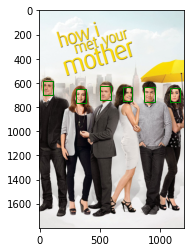

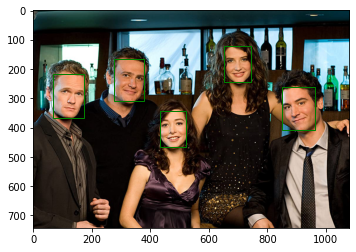

In [58]:
store_image('https://m.media-amazon.com/images/M/MV5BZWJjMDEzZjUtYWE1Yy00M2ZiLThlMmItODljNTAzODFiMzc2XkEyXkFqcGdeQXVyNTA4NzY1MzY@._V1_.jpg',
            'HHMYM_1.jpg')

image = plt.imread('HHMYM_1.jpg')
how_i_met_your_mother_1 = detector.detect_faces(image)

highlight_faces('HHMYM_1.jpg', how_i_met_your_mother_1)

store_image('https://images-na.ssl-images-amazon.com/images/G/01/digital/video/hero/TVSeries/HowIMetYourMother_6647600-HOWIMET._V392937824_SX1080_.jpg',
            'HHMYM_2.jpg')

image = plt.imread('HHMYM_2.jpg')
how_i_met_your_mother_2 = detector.detect_faces(image)

highlight_faces('HHMYM_2.jpg', how_i_met_your_mother_2)

0 0 0.24435847997665405


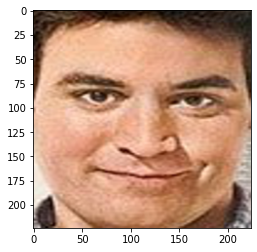

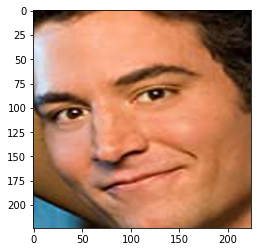

1 3 0.38357222080230713


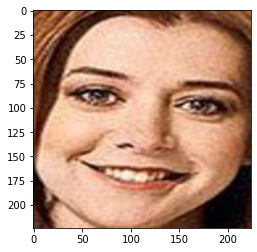

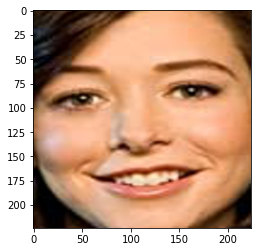

3 4 0.33693546056747437


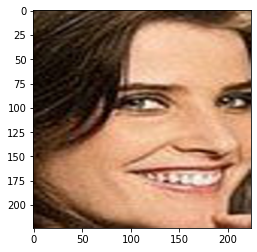

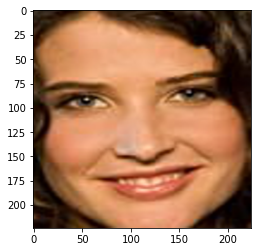

4 2 0.19564878940582275


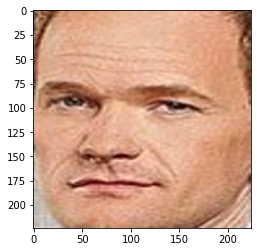

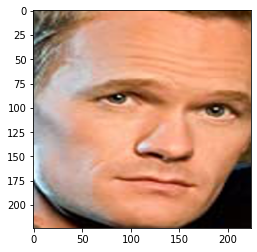

5 1 0.19841963052749634


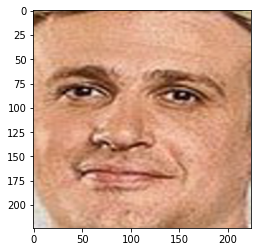

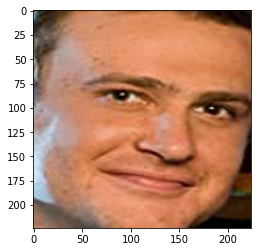

In [59]:
how_i_met_your_mother_1 = extract_face_from_image('HHMYM_1.jpg')
how_i_met_your_mother_2 = extract_face_from_image('HHMYM_2.jpg')

model_scores_how_i_met_your_mother_1 = get_model_scores(how_i_met_your_mother_1)
model_scores_how_i_met_your_mother_2 = get_model_scores(how_i_met_your_mother_2)
#print out players with similar faces in both pics
for idx, face_score_1 in enumerate(model_scores_how_i_met_your_mother_1):
  for idy, face_score_2 in enumerate(model_scores_how_i_met_your_mother_2):
    score = cosine(face_score_1, face_score_2)
    if score <= 0.4:
      # Printing the IDs of faces and score
      print(idx, idy, score)
      # Displaying each matched pair of faces
      plt.imshow(how_i_met_your_mother_1[idx])
      plt.show()
      plt.imshow(how_i_met_your_mother_2[idy])
      plt.show()